# Imports

In [1]:
# import ffmpeg
import cv2
import os
import math
import subprocess as sp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Variables

In [2]:
path="/home/rissu/Desktop/Projects/SlidesExtractor/input"
video_list = os.listdir(path)
print(video_list)
videoFile = path + "/" + video_list[2]
print("Processing", videoFile)



['Link for class Thursday 05-01-22 @ 12 pm-20220105_120228-Meeting Recording.mp4', 'new.mp4', '38. Smoke Signal.mkv']
Processing /home/rissu/Desktop/Projects/SlidesExtractor/input/38. Smoke Signal.mkv


# Comparator Function

In [5]:
# currently using MSE
# threshold = 36 # gave 136 images
# def ImgCmp(img1,img2):
#     if(img1.shape != img2.shape):
#         print("images shapes inconsistent, please use properly")
#     # both images are numpy array with shape (1080,1920,3)
#     sqsum = (img1-img2)**2
#     sqsum = np.sum(sqsum)
#     sqsum_mean = sqsum/(img1.shape[0] * img1.shape[1]);
#     return sqsum_mean;

# def sigmoid(x):
#     ans =  1/(1+np.exp(-0.0001*x))
#     return ans

# threshold = 50 # gave 136 images
mthreshold = 25
threshold_finder = []
def ImgCmp(img1,img2):
    if(img1.shape != img2.shape):
        print("images shapes inconsistent, please use properly")
    # both images are numpy array with shape (1080,1920,3)
    # I have to make 4 sections of the image
    shape = img1.shape
    split1 = []
    split2 = []
    split1.append(img1[:shape[0]//2, :shape[1]//2])
    split1.append(img1[:shape[0]//2, shape[1]//2:])
    split1.append(img1[shape[0]//2:, :shape[1]//2])
    split1.append(img1[shape[0]//2:, shape[1]//2:])
    split2.append(img2[:shape[0]//2, :shape[1]//2])
    split2.append(img2[:shape[0]//2, shape[1]//2:])
    split2.append(img2[shape[0]//2:, :shape[1]//2])
    split2.append(img2[shape[0]//2:, shape[1]//2:])
    
    outs = []
#     sigmou = []
    for i in range(4):
        sqsum = (split1[i]-split2[i])**2
#         mask = sqsum > 10
#         sqsum = np.multiply(sqsum, mask)
#         sqsum = np.sum(sqsum)
        sqsum_mean = sqsum/(split1[i].shape[0] * split1[i].shape[1]);
#         sigmo = sigmoid(sqsum_mean)
#         sigmo = sqsum_mean/1000
        outs.append(sqsum_mean)
#         sigmou.append(sigmo)
    decider = np.array(outs)
#     marker = np.sum(decider < mthreshold)
#     if marker >= 2:
#         return False
#     decider = np.sum(decider)/4
#     print(np.round(outs,0))
#     print(round(decider,2),marker,end='')
#     threshold_finder.append(decider)
#     if(decider > threshold):
#         return True # this means images are different
#     return False
    return decider
    
def Compare(lastframe,frame,newframe):
    pcmp = ImgCmp(lastframe,frame)
    ncmp = ImgCmp(frame,newframe )
    diff = pcmp-ncmp
#     marker = np.sum(diff < 6)
#     if marker >= 2:
#         return False
    diff = np.sum(diff)/4
    threshold_finder.append(diff)
    print(round(diff,2))
    if(diff > mthreshold):
        return True
    return False

# Extractor

In [6]:
######## Clean cache
for f in os.listdir("./cache"):
    os.remove("./cache/"+f)
########

count = 0
frame=np.zeros((1080,1920,3))
lastframe=np.zeros((1080,1920,3))
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5) #frame rate
total_frames=cap.get(cv2.CAP_PROP_FRAME_COUNT)
print("Frame Rate ", frameRate)
time_interval = 2
img_gap = math.floor(frameRate * time_interval) # ive set image interval to 10sec
if(img_gap == 0): # exception handling
    img_gap = 1
    print("img_gap has become 0, change it appropriately")
    
    
    
######## To figure out the threshold value
# mean_storage = []
########
titty = 0
while(cap.isOpened()):
    titty+=1
    frameId = cap.get(1) #current frame number
    ret, newframe = cap.read()
    if (ret != True):
        break
    if (frameId % img_gap == 0):
        # We got the frame we wanted
        # Do any image processing if you want
        if(Compare(lastframe,frame,newframe)):
            cv2.imwrite("./cache/"+str(count) + ".jpg",lastframe)
            count+=1
            
#         if(Compare(lastframe,frame,newframe)):
#             count+=1
#             cv2.imwrite("./cache/"+str(count) + ".jpg",frame)
#         else:
#             cv2.imwrite("./cache/"+str(count) + ".jpg",frame)
        lastframe = frame
        frame = newframe
#     print(round(titty*100/total_frames,2),"%",end='\r')
cap.release()
print("Total image count ", count)
print ("Done!")

Frame Rate  23.976023976023978
-194055.24
193753.06
111.14
-102.9
1.89
119.86
-141.08


KeyboardInterrupt: 

(array([  1.,   0.,   0.,   0., 163., 348.,   0.,   0.,   0.,   1.]),
 array([-1.02395014e+05, -8.19162183e+04, -6.14374229e+04, -4.09586276e+04,
        -2.04798323e+04, -1.03692323e+00,  2.04777584e+04,  4.09565537e+04,
         6.14353491e+04,  8.19141444e+04,  1.02392940e+05]),
 <BarContainer object of 10 artists>)

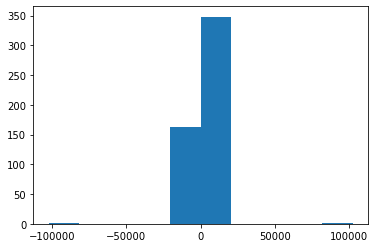

In [102]:
# def f(a):
#     if abs(a) > 10000:
#         return -100
#     return a
# b = [f(a) for a in threshold_finder]

(array([  1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   4.,   4.,   8.,  18.,  91., 202., 125.,  37.,
          7.,   3.,   6.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.]),
 array([-156.49752604, -153.52588639, -150.55424673, -147.58260707,
        -144.61096742, -141.63932776, -138.66768811, -135.69604845,
        -132.7244088 , -129.75276914, -126.78112948, -123.80948983,
        -120.83785017, -117.86621052, -114.89457086, -111.92293121,
        -108.95129155, -105.9796519 , -103.008

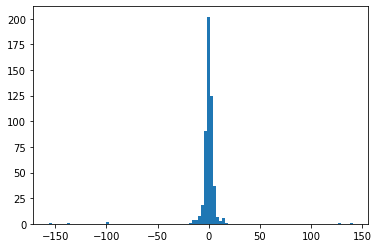

In [103]:
# plt.hist(b,100)

In [104]:
# b = set([int(a) for a in threshold_finder])
# c = {a:0 for a in b}
# for x in threshold_finder:
#     c[int(x)]+=1

In [105]:

# # Python3 code to demonstrate working of 
# # Sort Dictionary key and values List
# # Using loop + dictionary comprehension
  
# # initializing dictionary
# test_dict = c
# # Sort Dictionary key and values List
# # Using loop + dictionary comprehension
# res = dict()
# for key in sorted(test_dict):
#     res[key] = test_dict[key]
  
# # printing result 
# print(res) 

{-102395: 1, -156: 1, -138: 1, -18: 1, -16: 3, -14: 1, -13: 2, -12: 1, -11: 1, -10: 2, -9: 2, -8: 4, -7: 2, -6: 4, -5: 11, -4: 27, -3: 23, -2: 41, -1: 38, 0: 165, 1: 39, 2: 43, 3: 46, 4: 21, 5: 8, 6: 5, 7: 2, 8: 4, 9: 1, 10: 1, 11: 1, 12: 1, 13: 2, 14: 3, 15: 1, 17: 1, 127: 1, 140: 1, 102392: 1}


{-102395: 1,
 -156: 1,
 -138: 1,
 -18: 1,
 -16: 3,
 -14: 1,
 -13: 2,
 -12: 1,
 -11: 1,
 -10: 2,
 -9: 2,
 -8: 4,
 -7: 2,
 -6: 4,
 -5: 11,
 -4: 27,
 -3: 23,
 -2: 41,
 -1: 38,
 0: 165,
 1: 39,
 2: 43,
 3: 46,
 4: 21,
 5: 8,
 6: 5,
 7: 2,
 8: 4,
 9: 1,
 10: 1,
 11: 1,
 12: 1,
 13: 2,
 14: 3,
 15: 1,
 17: 1,
 127: 1,
 140: 1,
 102392: 1}

In [107]:
# i=0;
# sum = 0;
# k = [a for a in res.keys()]
# while(True):
#     sum += res[k[len(k)-i-1]]
#     print(k[len(k)-i-1], res[k[len(k)-i-1]])
#     i+=1
#     if(sum > 50):
#         break

102392 1
140 1
127 1
17 1
15 1
14 3
13 2
12 1
11 1
10 1
9 1
8 4
7 2
6 5
5 8
4 21


16

In [122]:
#!/usr/bin/env python
# coding: utf-8


### Necessary imports
import cv2
import os
import math
import subprocess as sp
import numpy as np
import sys
from time import sleep
from PIL import Image

### Listing variables
global videoFile
global threshold
global time_interval
videoFiles = []
threshold = 25
time_interval = 2

### Reading arguments

# Remove 1st argument from the
# list of command line arguments
argumentList = sys.argv[1:]

# Options
options = "hm"

# Long options
long_options = ["help", "multiple"]


try:

    if len(argumentList) == 1 and (argumentList[0] not in ["-h","--help"]):
        videoFiles.append(argumentList[0])
    elif argumentList[0] in ["-m","--multiple"]:
        for i in range(1,len(argumentList)):
            videoFiles.append(argumentList[i])
    else:
        print(
            " Usage1: slides_extractor.py {filename}\n",
            "Usage2: slides_extractor.py [OPTION] [VALUE(s)]\n\n",
            "-h, --help : show this help\n",
            "-m, --multiple: multiple files, write names of all the files separated by space"
            )
        sys.exit()
			
except:
	# output error, and return with an error code
    print("Oops", sys.exc_info()[0])
    print ("Invalid command: use ' slides_extractor.py -h ' to get help")
    sys.exit()

def ImgCmp(img1,img2):
    if(img1.shape != img2.shape):
        print("Exception: images' shapes inconsistent")
    # both images are numpy array with shape (1080,1920,3)
    shape = img1.shape
    split1 = []
    split2 = []
    # I have to make 4 sections of the image
    # split1.append(img1[:shape[0]//2, :shape[1]//2])
    # split1.append(img1[:shape[0]//2, shape[1]//2:])
    # split1.append(img1[shape[0]//2:, :shape[1]//2])
    # split1.append(img1[shape[0]//2:, shape[1]//2:])
    # split2.append(img2[:shape[0]//2, :shape[1]//2])
    # split2.append(img2[:shape[0]//2, shape[1]//2:])
    # split2.append(img2[shape[0]//2:, :shape[1]//2])
    # split2.append(img2[shape[0]//2:, shape[1]//2:])

    # just taking the whole image
    split1.append(img1)
    split2.append(img2)

    outs = []
    for i in range(len(split1)):
        sqsum = (split1[i]-split2[i])**2
        sqsum_mean = sqsum/(split1[i].shape[0] * split1[i].shape[1]);
        outs.append(sqsum_mean)
    decider = np.array(outs)
    return decider
    
### Bothway Comparision
def Compare(lastframe,frame,newframe):
    pcmp = ImgCmp(lastframe,frame)
    ncmp = ImgCmp(frame,newframe )
    diff = pcmp-ncmp
    # # attempt to ignore mouse motion
    # marker = np.sum(diff < 3)
    # if marker == 2:
    #     return False
    diff = np.sum(diff)/diff.size
    if(diff > threshold):
        return True
    return False

### Extractor
# Create a cache directory
cache_dir = ".cache"
while(not(os.path.isfile("./"+cache_dir))):
    cache_dir+="1"
os.mkdir("./"+cache_dir)

for videoFile in videoFiles:
    print("Starting processing for ",videoFile)
    #ensure cache is clean
    for f in os.listdir("./"+cache_dir):
        os.remove("./"+cache_dir+"/"+f)
    count = 0
    frame=np.zeros((1080,1920,3))
    lastframe=np.zeros((1080,1920,3))
    cap = cv2.VideoCapture(videoFile)
    frameRate = cap.get(5) #frame rate
    total_frames=cap.get(cv2.CAP_PROP_FRAME_COUNT)
    print("Frame Rate ", frameRate)
    img_gap = math.floor(frameRate * time_interval) # ive set image interval to 10sec
    if(img_gap == 0): # exception handling
        img_gap = 1
        print("Warning: img_gap has become 0, changing it appropriately")
        
        
        
    ## To figure out the threshold value
    # mean_storage = []
    ##
    visited_frames = 0
    while(cap.isOpened()):
        visited_frames+=1
        frameId = cap.get(1) #current frame number
        ret, newframe = cap.read()
        if (ret != True):
            break
        if (frameId % img_gap == 0):
            # We got the frame we wanted
            if(Compare(lastframe,frame,newframe)):
                count+=1
                cv2.imwrite("./"+cache_dir+"/"+str(count) + ".jpg",frame)
            else:
                cv2.imwrite("./"+cache_dir+"/"+str(count) + ".jpg",frame)
            lastframe = frame
            frame = newframe
            print(round(visited_frames*100/total_frames,2),"%",end='\r')
            sys.stdout.flush()
    cap.release()
    print("Total image count ", count)
    print ("Images are extracted in cache, proceeding to create a pdf!")
    image_list = os.listdir("./"+cache_dir)
    print(image_list)
    image_list = [Image.open('./'+cache_dir+"/"+f).convert('RGB') for f in image_list]
    image_list[0].save("./"+videoFile+".pdf", save_all=True, append_images=image_list)





ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



 Usage1: slides_extractor.py {filename}
 Usage2: slides_extractor.py [OPTION] [VALUE(s)]

 -h, --help : show this help
 -m, --multiple: multiple files, write names of all the files separated by space
Oops <class 'SystemExit'>
Invalid command: use ' slides_extractor.py -h ' to get help
Traceback (most recent call last):
  File "<ipython-input-122-1a3fbfc56a20>", line 50, in <module>
    sys.exit()
SystemExit

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/rissu/Programs/Anaconda3/envs/dubber/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3427, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-122-1a3fbfc56a20>", line 56, in <module>
    sys.exit()
SystemExit

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/rissu/Programs/Anaconda3/envs/dubber/lib/python3.8/site-packages/IPython/core/ultrat

TypeError: object of type 'NoneType' has no len()